## Diabetes Prediction with Support Vector Machine
in this project we will use svc(support vector machine) to predict weather a person is diabetic or not

In [1]:
#importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

## DATA

In [2]:
df = pd.read_csv('./diabetes.csv')

In [3]:
df.head()

#where 1 represent the patient is diabetic
# and 0 represent the patient is not a diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploring and Checking for NULL values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

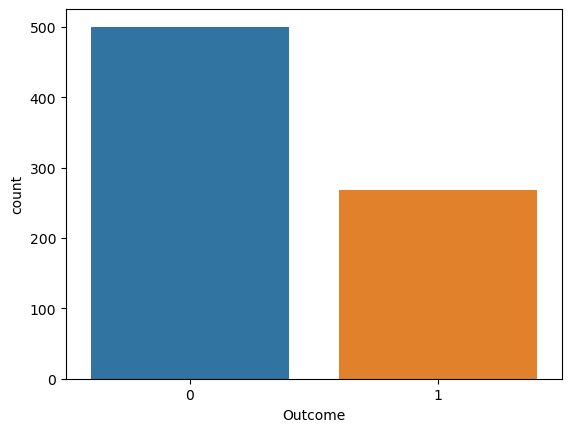

In [7]:
sns.countplot(x = 'Outcome', data = df)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
X = df.drop(columns=["Outcome"], axis=1)
y = df['Outcome']

## Spit Train and Test dasets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [11]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

## Balancing the Classes to be predicted

In [12]:
y_train.value_counts()

0    405
1    209
Name: Outcome, dtype: int64

In [13]:
y_test.value_counts()

0    95
1    59
Name: Outcome, dtype: int64

In [14]:
from imblearn.over_sampling import RandomOverSampler

In [15]:
ros = RandomOverSampler(random_state=40)

In [16]:
X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

In [17]:
y_train_os.value_counts()

0    405
1    405
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

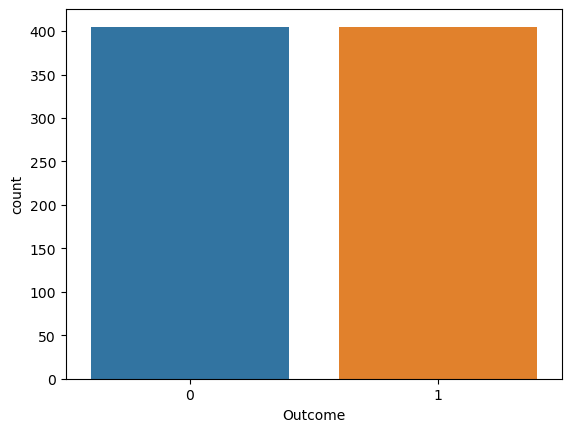

In [18]:
sns.countplot(x = y_train_os)

## Building Model by using pipeline

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

First I tried Logistic Regression Model

In [20]:
pipeline = Pipeline([
    ('scalar', StandardScaler()),
    ('regressor', LogisticRegression() )
])

In [21]:
pipeline.fit(X_train_os, y_train_os)

Pipeline(steps=[('scalar', StandardScaler()),
                ('regressor', LogisticRegression())])

In [22]:
pipeline.score(X_test, y_test)

0.7337662337662337

Then switched to SVC (support vector classifier) 

In [23]:
from sklearn.svm import SVC

In [24]:
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', random_state=40))
])

In [25]:
pipeline2.fit(X_train_os, y_train_os)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(kernel='linear', random_state=40))])

In [26]:
pipeline2.score(X_test, y_test)

0.7402597402597403

Yah! those two models are almost performing so close and I got 74% of accuracy